# Loading and Working The Raw Data

To be able to comprehend what data is, it is vital to learn which variables are concerned in the data.

In [87]:
#Group members: Bora Berk 03709300; Serdar Doruk S ̧enbayrak 03696074; Georgina Joy 03730465; Umut Ekin Gezer 03716498

In [1]:
import pandas as pd
import numpy as np

data_raw = pd.read_csv('NC_policing.csv')
data_raw.head()

# Solving issues with inputs such as NaN

data_raw = data_raw.fillna(False)

#Changing all input types to String to avoid clash of types
data_age=(data_raw["driver_age"]).astype(int)

data_without_age=data_raw.drop(columns='driver_age')

print(data_without_age.info())
print(data_age)

data_without_age = data_without_age.astype(str)

data_raw=data_without_age.join(data_age)

#data_raw = data_raw.astype(str)
print(data_raw)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   state               402087 non-null  object
 1   stop_date           402087 non-null  object
 2   driver_gender       402087 non-null  object
 3   driver_race_raw     402087 non-null  object
 4   driver_race         402087 non-null  object
 5   violation           402087 non-null  object
 6   search_type         402087 non-null  object
 7   contraband_found    402087 non-null  bool  
 8   stop_outcome        402087 non-null  object
 9   search_basis        402087 non-null  object
 10  officer_id          402087 non-null  int64 
 11  drugs_related_stop  402087 non-null  bool  
 12  district            402087 non-null  object
dtypes: bool(2), int64(1), object(10)
memory usage: 34.5+ MB
None
0         23
1         29
2         49
3         29
4         24
          ..
402082    

# Cleaning The Data Set and Separating y_Values

As the given data set contains both relevant and irrelevant information, the first step taken should be separating variables that theoretically does not have an influence on the selected result.
state: As all police stops took place in NC, this input obviously does not carry any value as a variable.
stop_date: Date on which events happen is irrelevant, since every actor behaves in constant manner.
driver_race_raw: Any information involved in driver_race_raw is present in data through driver_race, making this column also redundant.
officer_id: Considering every actor acts indifferently, and a unitary police perception is being sought, officer in patrol should be neglected, though relevant.

In [2]:
data = data_raw.drop(columns=['state','stop_date','driver_race_raw','officer_id'])
y = data.stop_outcome
X = data.drop(columns='stop_outcome')

X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   driver_gender       402087 non-null  object
 1   driver_race         402087 non-null  object
 2   violation           402087 non-null  object
 3   search_type         402087 non-null  object
 4   contraband_found    402087 non-null  object
 5   search_basis        402087 non-null  object
 6   drugs_related_stop  402087 non-null  object
 7   district            402087 non-null  object
 8   driver_age          402087 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 27.6+ MB


,driver_gender,driver_race,violation,search_type,contraband_found,search_basis,drugs_related_stop,district,driver_age
0,M,White,Speeding,No Search Conducted,False,No Search Conducted,False,E3,23
1,F,White,Speeding,No Search Conducted,False,No Search Conducted,False,E3,29
2,F,Black,Speeding,No Search Conducted,False,No Search Conducted,False,E3,49
3,M,Black,Speeding,No Search Conducted,False,No Search Conducted,False,E3,29
4,M,Hispanic,Speeding,No Search Conducted,False,No Search Conducted,False,E3,24


# Encoding Non-Numerical Values

In [3]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_encoded = encoder.fit_transform(y)



# Making X Suitable For Labeling

Analog to y values that are boolean, have hierarchical order are already in numbers are dropped. Moreover,
race is also dropped as it requires one hot-encoding to ensure political correctness.
Search_basis type is also dropped to correctly handle mix types concerning multiple reasons.

In [4]:
X_numeric = X.drop(columns=["search_type", "driver_race","driver_age","search_basis"])
#X_numeric.head()

Using dictionary to make sure search types hierarchical nature is taken into account

In [5]:
replacements_search = {'No Search Conducted': 0, 'Consent': 1, 'Protective Frisk': 2,
                     'Warrant': 3, 'Probable Cause': 4, 'Incident to Arrest': 5}
search_type = X['search_type'].replace(replacements_search)


Using one hot encoding for fields for which either political correctness (race) or
the possibility of simultaneous existence is required; Label encoder is used for the rest.

In [6]:
for column in X_numeric:
    X_numeric[column] = encoder.fit_transform(X_numeric[column])
#X_numeric.head()


# One Hot Encoding For Race

X_race = X['driver_race']
X_race = pd.get_dummies(X_race)
#X_race.head()

# One Hot Encoding For Search Basis Through Split&Merge

X_search_basis = X['search_basis']
X_search_basis = X_search_basis.str.split(',', expand=False)
X_search_basis = X_search_basis.str.join('|').str.get_dummies()

# Final Result After Cleaning and Ordering of The Raw Data (Aufgabe 1)

In [7]:
X_encoded = X_race.join(X.driver_age).join(X_numeric).join(X_search_basis)
X_encoded.head()

,Asian,Black,Hispanic,Other,White,driver_age,driver_gender,violation,contraband_found,drugs_related_stop,district,Erratic Suspicious Behaviour,Informant Tip,No Search Conducted,Observation Suspected Contraband,Other Official Info,Suspicious Movement,Witness Observation
0,0,0,0,0,1,23,1,6,0,0,34,0,0,1,0,0,0,0
1,0,0,0,0,1,29,0,6,0,0,34,0,0,1,0,0,0,0
2,0,1,0,0,0,49,0,6,0,0,34,0,0,1,0,0,0,0
3,0,1,0,0,0,29,1,6,0,0,34,0,0,1,0,0,0,0
4,0,0,1,0,0,24,1,6,0,0,34,0,0,1,0,0,0,0


In [8]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   Asian                             402087 non-null  uint8
 1   Black                             402087 non-null  uint8
 2   Hispanic                          402087 non-null  uint8
 3   Other                             402087 non-null  uint8
 4   White                             402087 non-null  uint8
 5   driver_age                        402087 non-null  int64
 6   driver_gender                     402087 non-null  int64
 7   violation                         402087 non-null  int64
 8   contraband_found                  402087 non-null  int64
 9   drugs_related_stop                402087 non-null  int64
 10  district                          402087 non-null  int64
 11  Erratic Suspicious Behaviour      402087 non-null  int64
 12  Informant Tip   

Splitting feature and target into the train and test data

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and test set
# test_size=0.3: 70% training set, 30% test set
# random_state=350: fix the random set to get the same result every time you run the code (for tutorial purposes)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=350)

# Scaling the train and test data 

In [10]:
from sklearn.preprocessing import StandardScaler
# Creating a scaler object (here with default settings)
scaler = StandardScaler()
# Replacing the values in our X_train by the normalized ones
X_train.values[:] = scaler.fit_transform(X_train)
# Replacing the values in our X_test by the normalized ones
X_test.values[:] = scaler.transform(X_test)

X_train.head(100)

,Asian,Black,Hispanic,Other,White,driver_age,driver_gender,violation,contraband_found,drugs_related_stop,district,Erratic Suspicious Behaviour,Informant Tip,No Search Conducted,Observation Suspected Contraband,Other Official Info,Suspicious Movement,Witness Observation
356440,0,0,0,0,1,44,1,2,1,1,19,1,0,0,0,0,0,0
290208,0,0,0,0,1,38,1,2,0,0,13,0,0,1,0,0,0,0
6515,0,1,0,0,0,27,1,0,0,0,20,0,0,1,0,0,0,0
171793,0,0,0,0,1,41,1,2,0,0,15,0,0,1,0,0,0,0
294958,0,0,0,0,1,58,1,2,0,0,42,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149949,0,1,0,0,0,33,1,2,0,0,56,0,0,1,0,0,0,0
156092,0,0,0,0,1,20,1,5,0,0,41,0,0,1,0,0,0,0
241589,0,0,0,0,1,37,1,2,0,0,43,0,0,1,0,0,0,0
373640,0,0,0,0,1,58,1,2,0,0,6,0,0,1,0,0,0,0


In [11]:
X_train.head(20)

,Asian,Black,Hispanic,Other,White,driver_age,driver_gender,violation,contraband_found,drugs_related_stop,district,Erratic Suspicious Behaviour,Informant Tip,No Search Conducted,Observation Suspected Contraband,Other Official Info,Suspicious Movement,Witness Observation
356440,0,0,0,0,1,44,1,2,1,1,19,1,0,0,0,0,0,0
290208,0,0,0,0,1,38,1,2,0,0,13,0,0,1,0,0,0,0
6515,0,1,0,0,0,27,1,0,0,0,20,0,0,1,0,0,0,0
171793,0,0,0,0,1,41,1,2,0,0,15,0,0,1,0,0,0,0
294958,0,0,0,0,1,58,1,2,0,0,42,0,0,1,0,0,0,0
8195,0,0,1,0,0,30,1,0,0,0,57,0,0,1,0,0,0,0
189479,0,0,0,0,1,55,1,2,0,0,35,0,0,1,0,0,0,0
278142,0,0,0,0,1,56,1,2,0,0,43,0,0,1,0,0,0,0
309571,0,0,0,0,1,44,1,2,0,0,46,0,0,1,0,0,0,0
301026,0,0,0,0,1,37,1,2,0,0,56,0,0,1,0,0,0,0


In [12]:
data_arrest = y_encoded[y_encoded == 0]
data_no_act = y_encoded[y_encoded == 1]

print("Number of Total Cases: " + str(len(y_encoded))) 
print("Number of Cases Resulting Arrest: " + str(len(data_arrest)))
print("Number of Cases Closed Without Action: " + str(len(data_no_act)))
print("Percentile of Arrests: " + str("{:.2f}".format(100*(len(data_arrest))/len(y_encoded))) + "%")

data_arrest_test = y_test[y_test == 0]
data_noact_test = y_test[y_test == 1]
print(len(data_arrest_test), len(data_noact_test))

Number of Total Cases: 402087
Number of Cases Resulting Arrest: 123814
Number of Cases Closed Without Action: 278273
Percentile of Arrests: 30.79%
37021 83606


# First method : KNeighborsClassifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


# Create an instance of KNN with n_neighbors=1 (k=1)
knn = KNeighborsClassifier(n_neighbors=1)
# Train the model on the training set with the encoded labels
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

<Figure size 432x288 with 0 Axes>

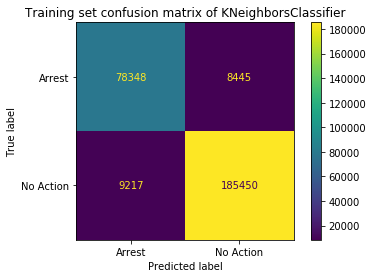

<Figure size 432x288 with 0 Axes>

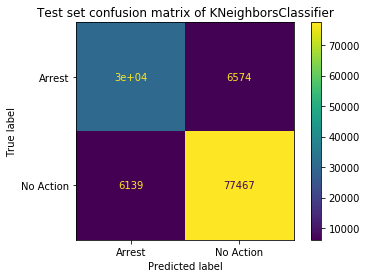

In [14]:
# Plot the confusion matrix for the training set
plt.figure()
plot_confusion_matrix(knn, X_train, y_train, display_labels=['Arrest','No Action'])
plt.title('Training set confusion matrix of KNeighborsClassifier')
plt.show()

# Plot the confusion matrix for the test set
plt.figure()
plot_confusion_matrix(knn, X_test, y_test, display_labels=['Arrest','No Action'])
plt.title('Test set confusion matrix of KNeighborsClassifier')
plt.show()

# Second Method : DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Maximum depth of the tree
md=6
# The minimum number of samples required to split an internal node
mss=18
# Maximum number of allowed leaf nodes
mln=10

# Create an instance of the decision tree classifier with the predefined parameters
dct = DecisionTreeClassifier(random_state=42, max_depth=md, min_samples_split=mss, max_leaf_nodes=mln, criterion='gini')

# Train the model using the training set
dct.fit(X_train, y_train)

# Plot a graphical representation of the splits within the grown decision tree
plt.figure(figsize=[15,15])
plot_tree(dct, filled=True, feature_names=X_train.columns)
plt.show()


# Plot the confusion matrix for the training set
plt.figure()
plot_confusion_matrix(dct, X_train, y_train, display_labels=['Arrest', 'No Action'])
plt.title('Training set confusion matrix of Decision Tree')
plt.show()

# Plot the confusion matrix for the test set
plt.figure()
plot_confusion_matrix(dct, X_test, y_test, display_labels=['Arrest', 'No Action'])
plt.title('Test set confusion matrix of Decision Tree')
plt.show()

# Dummy Classifier (strategy: select not to arrest)

0.6930952440166795


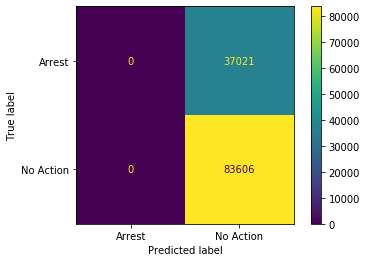

In [51]:
#dclf = DummyClassifier(strategy = s, random_state = 1, constant ='M') 
#Recall of DC:		 0.0

from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
clf_dummy = DummyClassifier(strategy = 'constant', constant=1).fit(X_train,y_train)
print(clf_dummy.score(X_test,y_test))

plot_confusion_matrix(clf_dummy, X_test, y_test, display_labels=['Arrest','No Action'])

# Precision and Recall (Calculating tp,fp,fn,tn):

In [52]:
# 4 entries in the matrix:
#tp: true positive for each classifier
#fp: false positive
#fn: false negative
#tn: true negative

In [53]:
from sklearn.metrics import confusion_matrix
#For the KNN
[[tn_knn, fp_knn], [fn_knn, tp_knn]] = confusion_matrix(y_test, knn.predict(X_test))
#For the Decision Tree
[[tn_dct, fp_dct], [fn_dct, tp_dct]] = confusion_matrix(y_test, dct.predict(X_test))
#For Dummy Classifier
[[tn_dc, fp_dc], [fn_dc, tp_dc]] = confusion_matrix(y_test, clf_dummy.predict(X_test))

In [54]:
def recall(tp,fn):
    return tp / (tp + fn)

def precision(tp,fp):
    return tp / (tp + fp)

recall_knn = recall(tp_knn,fn_knn)
precision_knn = precision(tp_knn,fp_knn)

recall_dct = recall(tp_dct,fn_dct)
precision_dct = precision(tp_dct,fp_dct)

recall_dc = recall(tp_dc,fn_dc)
precision_dc = precision(tp_dc,fp_dc)

print('Recall of KNN:\t\t',recall_knn)
print('Precision of KNN:\t',precision_knn)
print('Recall of DCT:\t\t',recall_dct)
print('Precision of DCT:\t',precision_dct)
print('Recall of DC:\t\t',recall_dc)
print('Precision of DC:\t',precision_dc)

Recall of KNN:		 0.9265722555797431
Precision of KNN:	 0.9217762758653515
Recall of DCT:		 0.9750855201779777
Precision of DCT:	 0.9228531322873509
Recall of DC:		 1.0
Precision of DC:	 0.6930952440166795


In [55]:
print(tn_dc, fp_dc, fn_dc, tp_dc)

0 37021 0 83606


Higher precision values suggest that a better classification took place regarding the relevancy of the selected data in all data available, while higher recall values point out a higher proportion of the data that should be selected is selected. Considering that DCT returns higher results in both context and DC returns worst (nan- Not A Number- is the natural result of the formula highlighting the unappropriateness of the method selected) It is possible to reach the conclusion that both of the given methods work far better than dummy while DCT triumphs over KNN.

# F1 scores

In [56]:
from sklearn.metrics import f1_score

f1_knn = f1_score(y_test, knn.predict(X_test))
f1_dct = f1_score(y_test, dct.predict(X_test))
f1_dc = f1_score(y_test, clf_dummy.predict(X_test))

print('F1 Score of KNeighborsClassifier:\t',f1_knn)
print('F1 Score of DecisionTreeClassifier:\t',f1_dct)
print('F1 of Dummy Classifier:\t',f1_dc)

F1 Score of KNeighborsClassifier:	 0.9241680435677346
F1 Score of DecisionTreeClassifier:	 0.948250593216396
F1 of Dummy Classifier:	 0.8187315468117298


As f1 score is the natural combinational of how well a method does concerning recall and precision, the results are in accordance with the conclusions drawn for the recall and precision. 

# Precision Recall Curves

[0. 1.] [0.00141636 0.05139994 0.18246687 0.23208887 0.54006969 0.64229317
 0.70542491 0.76051882 0.78780984 0.96545877] [1.]


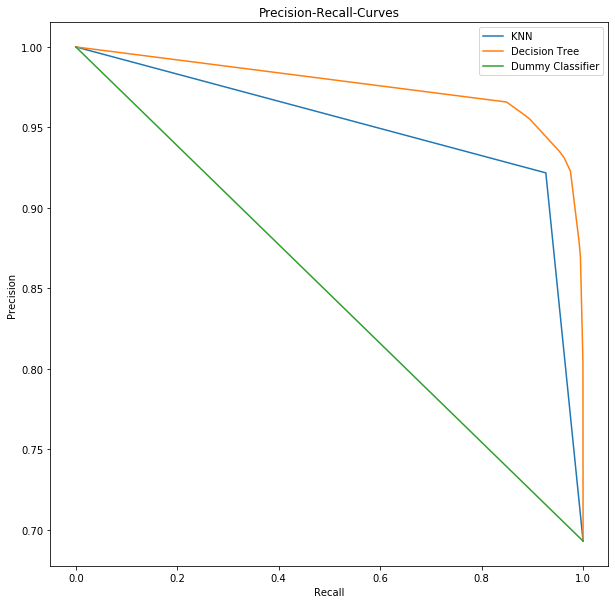

In [57]:
from sklearn.metrics import precision_recall_curve

precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])
precision_dct, recall_dct, thresholds_dct = precision_recall_curve(y_test, dct.predict_proba(X_test)[:, 1])
precision_dc, recall_dc, thresholds_dc = precision_recall_curve(y_test, clf_dummy.predict_proba(X_test)[:, 1])

print(thresholds_knn,thresholds_dct ,thresholds_dc)
#Plot the curve
plt.figure(figsize=[10,10])
plt.plot(recall_knn, precision_knn, label='KNN')
plt.plot(recall_dct, precision_dct, label='Decision Tree')
plt.plot(recall_dc, precision_dc, label='Dummy Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Curves')
plt.legend(loc='upper right')
plt.show()

# ROC CURVES

('KNN Threshold:', array([2., 1., 0.]), ' Decision Tree Threshold:', array([1.96545877e+00, 9.65458766e-01, 7.87809843e-01, 7.60518823e-01,
       7.05424910e-01, 6.42293169e-01, 5.40069686e-01, 2.32088870e-01,
       1.82466871e-01, 5.13999380e-02, 1.41635764e-03]), ' Dummy Classifier Threshold:', array([2., 1.]))


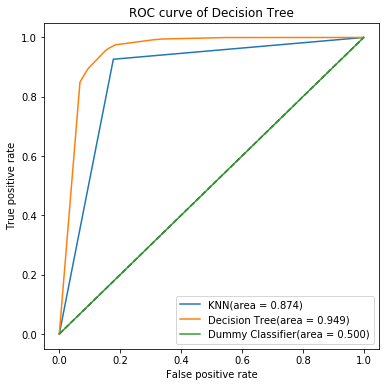

In [59]:
from sklearn.metrics import roc_curve, auc

#Calculate the false positive and true positive rates for KNN, Decision Tree and Dummy Classifier

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
fpr_dct, tpr_dct, thresholds_dct = roc_curve(y_test, dct.predict_proba(X_test)[:, 1])
fpr_dc, tpr_dc, thresholds_dc = roc_curve(y_test, clf_dummy.predict_proba(X_test)[:, 1])


thresholds=("KNN Threshold:",thresholds_knn," Decision Tree Threshold:",thresholds_dct," Dummy Classifier Threshold:",thresholds_dc)
print(thresholds)
#Calculate the area under the curve
auc_knn = auc(fpr_knn, tpr_knn)
auc_dct = auc(fpr_dct, tpr_dct)
auc_dc = auc(fpr_dc, tpr_dc)

#Plot the ROC curve
plt.figure(figsize=[6,6])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN(area = {:.3f})'.format(auc_knn))
plt.plot(fpr_dct, tpr_dct, label='Decision Tree(area = {:.3f})'.format(auc_dct))
plt.plot(fpr_dc, tpr_dc, label='Dummy Classifier(area = {:.3f})'.format(auc_dc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of Decision Tree')
plt.legend(loc='lower right')
plt.show()

The consequential tendency can also be illustrated through ROC curves, as the AUCs (Area Under Curve) are  direct results of the selected method's excellence in the f1. DTC algorithm yields the most upper left curve with the biggest AUC, suggesting its success. 

**************************** End of Task 2 ***************************************************

Task 3 :Which of the features in the dataset are suitable to form groups that can be checked for fairness. Use the results of one of your classifiers to calculate independence, separation and sufficiency for those groups. What do you notice?

# Define independence, separation and sufficiency functions:

In [24]:
def independence(tn, fp, fn, tp):
    
    independence = (tp + fp) / (tn + fp + fn + tp)
    
    return independence



def separation(tn, fp, fn, tp):
    
    Y_1 = tp / (tp + fp)
    Y_0 = tn / (tn + fn)
    
        
    return Y_1, Y_0


def sufficiency(tn, fp, fn, tp):
    
    R_1 = tp / (tp + fn)
    R_0= fp / (fp + tn)
    
    return R_1, R_0

First, form a group according to gender Decision Tree has the best performance compare to KNN and Dummy Classifier:

# 1-)Gender Part

In [25]:
print(data_raw["driver_gender"])
print(data_raw["driver_gender"].unique())
print(X_encoded["driver_gender"])
print(data_raw["stop_outcome"].unique())
print(data_raw["stop_outcome"])
print(y_encoded)

#group 0 :female
#group 1 :male

0         M
1         F
2         F
3         M
4         M
         ..
402082    M
402083    F
402084    F
402085    F
402086    M
Name: driver_gender, Length: 402087, dtype: object
['M' 'F']
0         1
1         0
2         0
3         1
4         1
         ..
402082    1
402083    0
402084    0
402085    0
402086    1
Name: driver_gender, Length: 402087, dtype: int64
['Arrest' 'No Action']
0         Arrest
1         Arrest
2         Arrest
3         Arrest
4         Arrest
           ...  
402082    Arrest
402083    Arrest
402084    Arrest
402085    Arrest
402086    Arrest
Name: stop_outcome, Length: 402087, dtype: object
[0 0 0 ... 0 0 0]


In [26]:
from sklearn.metrics import confusion_matrix

group_female = X_test["driver_gender"]== 0
group_male = X_test["driver_gender"]== 1

data_female=data_raw[data_raw["driver_gender"]=="F"]
data_male=data_raw[data_raw["driver_gender"]=="M"]


Distribution of gender in the data

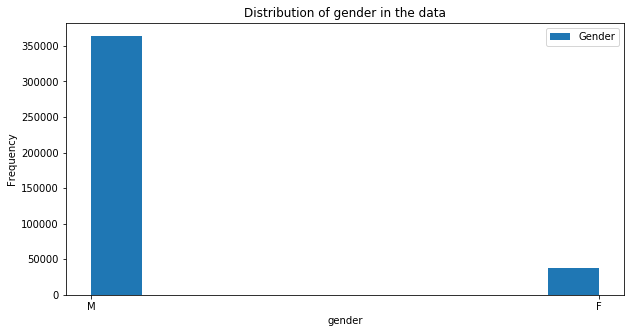

In [27]:
plt.figure(figsize=(10,5))
plt.hist(data_raw['driver_gender'], label='Gender')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('gender')
plt.title("Distribution of gender in the data")
plt.show()

/Users/umutekingezer/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


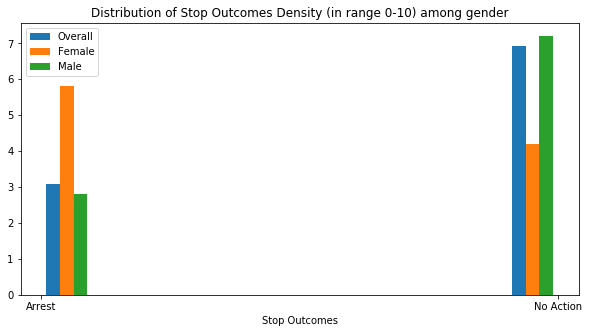

In [28]:
#Plot the distribution
plt.figure(figsize=(10,5))


plt.hist([data_raw['stop_outcome'], data_female['stop_outcome'], data_male['stop_outcome']], density=True, 
           label=['Overall', 'Female', 'Male'])

plt.xlabel('Stop Outcomes')
plt.title('Distribution of Stop Outcomes Density (in range 0-10) among gender')
plt.legend(loc='best')
plt.show()

In [29]:

from sklearn.metrics import confusion_matrix

#y_pred for Decision Tree Classifier
y_pred=dct.predict(X_test)

#take confusion matrix of both groups

cm_female = confusion_matrix(y_test[group_female], y_pred[group_female])
cm_male = confusion_matrix(y_test[group_male], y_pred[group_male])

tn_female, fp_female, fn_female, tp_female = cm_female.ravel()
tn_male, fp_male, fn_male, tp_male = cm_male.ravel()


<Figure size 432x288 with 0 Axes>

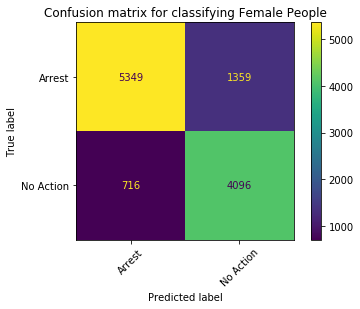

<Figure size 432x288 with 0 Axes>

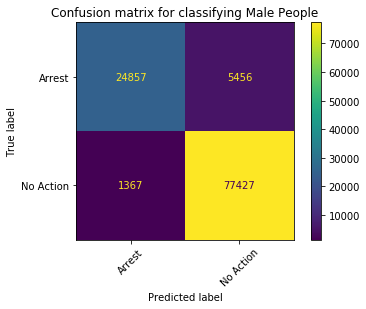

In [30]:
# YOUR CODE HERE
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_female, display_labels=['Arrest', 'No Action'])
disp.plot()
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for classifying Female People")
plt.show()

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_male, display_labels=['Arrest', 'No Action'])
disp.plot()
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for classifying Male People")
plt.show()

# Calculate Independence,Separation and Sufficiency Functions for Gender:

In [31]:
sufficiency(tn_female, fp_female, fn_female, tp_female)
independence(tn_female, fp_female, fn_female, tp_female)
separation(tn_female, fp_female, fn_female, tp_female)


(0.7508707607699359, 0.8819455894476504)

# Independence Gender

In [32]:
independence_female=independence(tn_female, fp_female, fn_female, tp_female)
independence_male=independence(tn_male, fp_male, fn_male, tp_male)


print('Independence Female:\t',independence_female)
print('Independence Male:\t',independence_male)


Independence Female:	 0.4735243055555556
Independence Male:	 0.7596487851375255


# Separation Gender

In [33]:
(separation_female_y1,separation_female_y0) = separation(tn_female, fp_female, fn_female, tp_female)
(separation_male_y1,separation_male_y0) = separation(tn_male, fp_male, fn_male, tp_male)

print('Separation Y1 Female:\t',separation_female_y1)
print('Separation Y0 Female:\t',separation_female_y0)
print("*"*50)
print('Separation Y1 Male:\t',separation_male_y1)
print('Separation Y0 Male:\t',separation_male_y0)

Separation Y1 Female:	 0.7508707607699359
Separation Y0 Female:	 0.8819455894476504
**************************************************
Separation Y1 Male:	 0.9341722669304924
Separation Y0 Male:	 0.9478721781574131


# Sufficiency Gender

In [34]:
(sufficiency_female_r1,sufficiency_female_r0) = sufficiency(tn_female, fp_female, fn_female, tp_female)
(sufficiency_male_r1,sufficiency_male_r0) = sufficiency(tn_male, fp_male, fn_male, tp_male)

print('Sufficiency R1 Female:\t',sufficiency_female_r1)
print('Sufficiency R0 Female:\t',sufficiency_female_r0)
print("*"*50)
print('Sufficiency R1 Male:\t',sufficiency_male_r1)
print('Sufficiency R0 Male:\t',sufficiency_male_r0)


Sufficiency R1 Female:	 0.8512053200332502
Sufficiency R0 Female:	 0.20259391771019677
**************************************************
Sufficiency R1 Male:	 0.9826509632713151
Sufficiency R0 Male:	 0.17998878369016594


In [35]:
# TODO : Interpret the Independence,Separation and Sufficiency result and find sensitive group and report !!!

# 2-) Race Comparision

In [36]:
print(data_raw["driver_race"].head(40))
print(data_raw["driver_race"].unique())
#print(X_encoded["driver_race"])
#print(data_raw["stop_outcome"].unique())
#print(data_raw["stop_outcome"])
#print(y_encoded)



0        White
1        White
2        Black
3        Black
4     Hispanic
5        Black
6        Black
7        White
8        Black
9        Black
10       Black
11       Black
12    Hispanic
13       Black
14    Hispanic
15    Hispanic
16       White
17       White
18       Black
19       White
20       White
21    Hispanic
22       Black
23       Black
24       White
25       Black
26       White
27       White
28    Hispanic
29       White
30       White
31       White
32    Hispanic
33       White
34       Black
35       White
36       Black
37       White
38       White
39       White
Name: driver_race, dtype: object
['White' 'Black' 'Hispanic' 'Other' 'Asian']


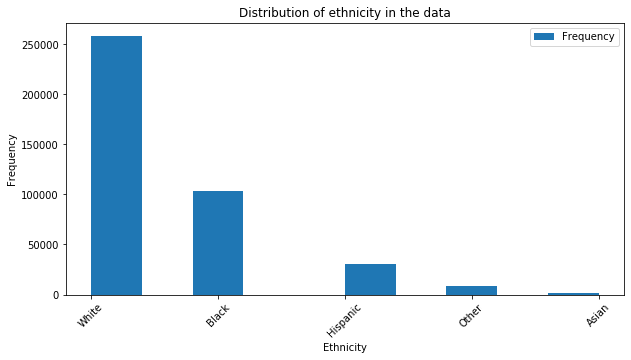

In [37]:
plt.figure(figsize=(10,5))
plt.hist(data_raw['driver_race'], label='Frequency')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Ethnicity')
plt.xticks(rotation=45)
plt.title("Distribution of ethnicity in the data")
plt.show()

In [38]:
X_test

,Asian,Black,Hispanic,Other,White,driver_age,driver_gender,violation,contraband_found,drugs_related_stop,district,Erratic Suspicious Behaviour,Informant Tip,No Search Conducted,Observation Suspected Contraband,Other Official Info,Suspicious Movement,Witness Observation
354085,0,1,0,0,0,65,1,2,0,0,43,0,0,1,0,0,0,0
118627,0,0,0,0,1,46,1,2,0,0,14,0,0,1,0,0,0,0
193691,0,0,0,0,1,41,1,2,0,0,23,0,0,1,0,0,0,0
355816,0,0,0,0,1,51,1,2,0,0,42,0,0,1,0,0,0,0
391386,0,0,0,0,1,53,1,5,0,0,16,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99811,0,0,0,0,1,54,1,2,0,0,28,0,0,1,0,0,0,0
249870,0,0,0,0,1,46,1,2,0,0,26,0,0,1,0,0,0,0
45103,0,0,0,0,1,26,1,6,0,0,14,0,0,1,0,0,0,0
7644,0,1,0,0,0,40,1,0,0,0,9,0,0,1,0,0,0,0


In [39]:
group_black = X_test["Black"]== 1
group_hispanic = X_test["Hispanic"]== 1
group_white= X_test["White"]==1
group_asian=X_test["Asian"]==1
group_other=X_test["Other"]==1

data_black=data_raw[data_raw["driver_race"]=="Black"]
data_hispanic=data_raw[data_raw["driver_race"]=="Hispanic"]
data_white=data_raw[data_raw["driver_race"]=="White"]
data_asian=data_raw[data_raw["driver_race"]=="Asian"]
data_other=data_raw[data_raw["driver_race"]=="Other"]



In [40]:
data_black

,state,stop_date,driver_gender,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district,driver_age
2,NC,2000-07-31,F,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,49
3,NC,2000-07-31,M,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,29
5,NC,2000-07-31,M,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,21
6,NC,2000-07-31,M,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,33
8,NC,2000-08-01,M,B N,Black,Speeding,Protective Frisk,False,Arrest,Observation Suspected Contraband,10241,False,E2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402075,NC,2015-12-31,M,B N,Black,Other,No Search Conducted,False,No Action,No Search Conducted,21428,False,D6,44
402076,NC,2015-12-31,M,B N,Black,Other,No Search Conducted,False,No Action,No Search Conducted,10121,False,C4,40
402077,NC,2015-12-31,M,B N,Black,Other,No Search Conducted,False,No Action,No Search Conducted,21327,False,A6,64
402081,NC,2015-12-31,M,B N,Black,Speeding,Incident to Arrest,False,Arrest,Other Official Info,21443,False,E3,37


In [41]:
data_hispanic

,state,stop_date,driver_gender,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district,driver_age
4,NC,2000-07-31,M,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,24
12,NC,2000-08-01,M,U H,Hispanic,DUI,No Search Conducted,False,Arrest,No Search Conducted,10233,False,C6,20
14,NC,2000-08-01,M,U H,Hispanic,Equipment,No Search Conducted,False,Arrest,No Search Conducted,10475,False,F1,33
15,NC,2000-08-01,M,U H,Hispanic,Speeding,Incident to Arrest,False,Arrest,Erratic Suspicious Behaviour,11205,False,A2,20
21,NC,2000-08-01,M,U H,Hispanic,Other,No Search Conducted,False,No Action,No Search Conducted,10227,False,C5,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402007,NC,2015-12-30,M,U H,Hispanic,Other,No Search Conducted,False,No Action,No Search Conducted,11463,False,C8,39
402016,NC,2015-12-30,M,U H,Hispanic,Registration/plates,No Search Conducted,False,No Action,No Search Conducted,11395,False,D2,45
402028,NC,2015-12-30,M,U H,Hispanic,Other,No Search Conducted,False,No Action,No Search Conducted,10664,False,G4,26
402042,NC,2015-12-31,M,U H,Hispanic,Registration/plates,No Search Conducted,False,No Action,No Search Conducted,11395,False,D2,53


/Users/umutekingezer/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


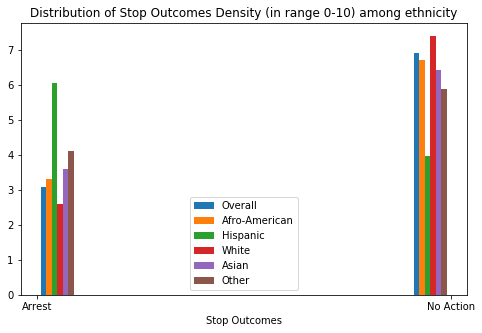

In [42]:
#Plot the distribution
plt.figure(figsize=(8,5))


plt.hist([data_raw['stop_outcome'], data_black['stop_outcome'], data_hispanic['stop_outcome'],data_white['stop_outcome'],data_asian['stop_outcome'],data_other['stop_outcome']], density=True, 
           label=['Overall', 'Afro-American', 'Hispanic','White','Asian','Other'])

plt.xlabel('Stop Outcomes')
plt.title('Distribution of Stop Outcomes Density (in range 0-10) among ethnicity')
plt.legend(loc='best')
plt.show()

In [43]:
#take confusion matrix of both groups

cm_black = confusion_matrix(y_test[group_black], y_pred[group_black])
cm_hispanic = confusion_matrix(y_test[group_hispanic], y_pred[group_hispanic])
cm_white = confusion_matrix(y_test[group_white], y_pred[group_white])
cm_asian = confusion_matrix(y_test[group_asian], y_pred[group_asian])
cm_other = confusion_matrix(y_test[group_other], y_pred[group_other])



tn_black, fp_black, fn_black, tp_black = cm_black.ravel()
tn_hispanic, fp_hispanic, fn_hispanic, tp_hispanic = cm_hispanic.ravel()
tn_white, fp_white, fn_white, tp_white = cm_white.ravel()
tn_asian, fp_asian, fn_asian, tp_asian = cm_asian.ravel()
tn_other, fp_other, fn_other, tp_other = cm_other.ravel()


<Figure size 432x288 with 0 Axes>

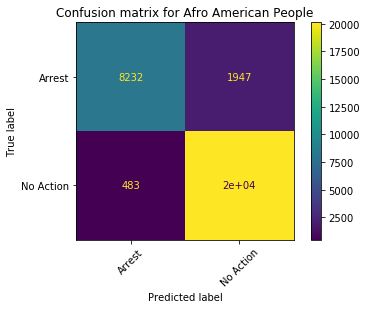

<Figure size 432x288 with 0 Axes>

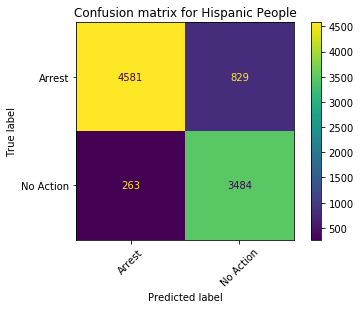

<Figure size 432x288 with 0 Axes>

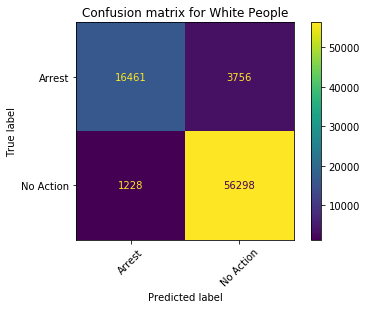

<Figure size 432x288 with 0 Axes>

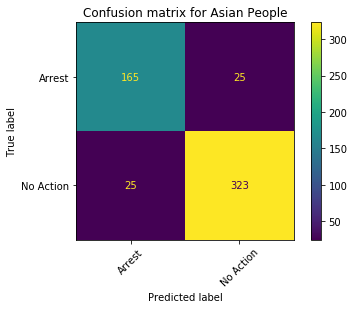

<Figure size 432x288 with 0 Axes>

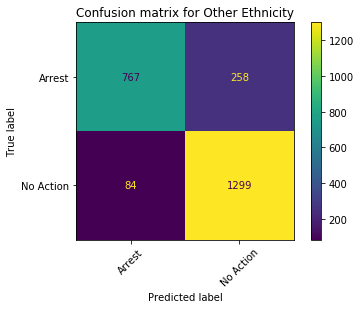

In [44]:
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_black, display_labels=['Arrest', 'No Action'])
disp.plot()
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for Afro American People")
plt.show()

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_hispanic, display_labels=['Arrest', 'No Action'])
disp.plot()
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for Hispanic People")
plt.show()

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_white, display_labels=['Arrest', 'No Action'])
disp.plot()
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for White People")
plt.show()

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_asian, display_labels=['Arrest', 'No Action'])
disp.plot()
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for Asian People")
plt.show()

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_other, display_labels=['Arrest', 'No Action'])
disp.plot()
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for Other Ethnicity")
plt.show()



# Calculate Independence,Separation and Sufficiency Functions for Ethnicity:

# Independence for Ethnicity 

In [45]:
independence_black=independence(tn_black, fp_black, fn_black, tp_black)
independence_hispanic=independence(tn_hispanic, fp_hispanic, fn_hispanic, tp_hispanic)
independence_white=independence(tn_white, fp_white, fn_white, tp_white)
independence_asian=independence(tn_asian, fp_asian, fn_asian, tp_asian) 
independence_other=independence(tn_other, fp_other, fn_other, tp_other) 


print('Independence Afro American:\t',independence_black)
print('Independence Hispanic     :\t',independence_hispanic)
print('Independence White        :\t',independence_white)
print('Independence Asian        :\t',independence_asian)
print('Independence Other Ethnicities          :\t',independence_other)

Independence Afro American:	 0.7168707969201781
Independence Hispanic     :	 0.47100578792180847
Independence White        :	 0.772468260808047
Independence Asian        :	 0.6468401486988847
Independence Other Ethnicities          :	 0.646594684385382


# Separation for Ethnicity 

In [46]:
(separation_black_y1,separation_black_y0) = separation(tn_black, fp_black, fn_black, tp_black)
(separation_hispanic_y1,separation_hispanic_y0) = separation(tn_hispanic, fp_hispanic, fn_hispanic, tp_hispanic)
(separation_white_y1,separation_white_y0)=separation(tn_white, fp_white, fn_white, tp_white)
(separation_asian_y1,separation_asian_y0)=separation(tn_asian, fp_asian, fn_asian, tp_asian) 
(separation_other_y1,separation_other_y0)=separation(tn_other, fp_other, fn_other, tp_other) 

print('Separation Y1 Afro American         :\t',separation_black_y1)
print('Separation Y1 Hispanic              :\t',separation_hispanic_y1)
print('Separation Y1 White                 :\t',separation_white_y1)
print('Separation Y1 Asian                 :\t',separation_asian_y1)
print('Separation Y1 Other Ethnicities     :\t',separation_other_y1)

print("*"*65)

print('Separation Y0 Afro American         :\t',separation_black_y0)
print('Separation Y0 Hispanic              :\t',separation_hispanic_y0)
print('Separation Y0 White                 :\t',separation_white_y0)
print('Separation Y0 Asian                 :\t',separation_asian_y0)
print('Separation Y0 Other Ethnicities     :\t',separation_other_y0)

Separation Y1 Afro American         :	 0.9117647058823529
Separation Y1 Hispanic              :	 0.8077904011129144
Separation Y1 White                 :	 0.9374562893395944
Separation Y1 Asian                 :	 0.9281609195402298
Separation Y1 Other Ethnicities     :	 0.8342967244701349
*****************************************************************
Separation Y0 Afro American         :	 0.944578313253012
Separation Y0 Hispanic              :	 0.9457060280759703
Separation Y0 White                 :	 0.9305783255130307
Separation Y0 Asian                 :	 0.868421052631579
Separation Y0 Other Ethnicities     :	 0.9012925969447708


# Sufficiency for Ethnicity 

In [47]:
(sufficiency_black_r1,sufficiency_black_r0) = sufficiency(tn_black, fp_black, fn_black, tp_black)
(sufficiency_hispanic_r1,sufficiency_hispanic_r0) = sufficiency(tn_hispanic, fp_hispanic, fn_hispanic, tp_hispanic)
(sufficiency_white_r1,sufficiency_white_r0)=sufficiency(tn_white, fp_white, fn_white, tp_white)
(sufficiency_asian_r1,sufficiency_asian_r0)=sufficiency(tn_asian, fp_asian, fn_asian, tp_asian) 
(sufficiency_other_r1,sufficiency_other_r0)=sufficiency(tn_other, fp_other, fn_other, tp_other)

print('Sufficiency R1 Afro America          :\t',sufficiency_black_r1)
print('Sufficiency R1 Hispanic              :\t',sufficiency_hispanic_r1)
print('Sufficiency R1 White                 :\t',sufficiency_white_r1)
print('Sufficiency R1 Asian                 :\t',sufficiency_asian_r1)
print('Sufficiency R1 Other Ethnicities     :\t',sufficiency_other_r1)
print("*"*65)
print('Sufficiency R0 Hispanic              :\t',sufficiency_hispanic_r0)
print('Sufficiency R0 Afro American         :\t',sufficiency_black_r0)
print('Sufficiency R0 White                 :\t',sufficiency_white_r0)
print('Sufficiency R0 Asian                 :\t',sufficiency_asian_r0)
print('Sufficiency R0 Other Ethnicities     :\t',sufficiency_other_r0)



Sufficiency R1 Afro America          :	 0.9765556742063878
Sufficiency R1 Hispanic              :	 0.9298105150787297
Sufficiency R1 White                 :	 0.9786531307582659
Sufficiency R1 Asian                 :	 0.9281609195402298
Sufficiency R1 Other Ethnicities     :	 0.9392624728850325
*****************************************************************
Sufficiency R0 Hispanic              :	 0.15323475046210722
Sufficiency R0 Afro American         :	 0.19127615679339818
Sufficiency R0 White                 :	 0.1857842409853094
Sufficiency R0 Asian                 :	 0.13157894736842105
Sufficiency R0 Other Ethnicities     :	 0.25170731707317073


In [48]:
#TODO Interpret Independence,Separation and Sufficiency Functions for Ethnicity, compare the results

# 3-)Age Group Comparision (Young - Middle Aged - Old)

In [49]:
age_counts = data_raw["driver_age"].value_counts()

print(age_counts)

45    12259
42    11497
40    11127
43    11119
44    10901
      ...  
94        2
98        2
92        2
96        1
99        1
Name: driver_age, Length: 84, dtype: int64


ValueError: could not convert string to float: 'M'

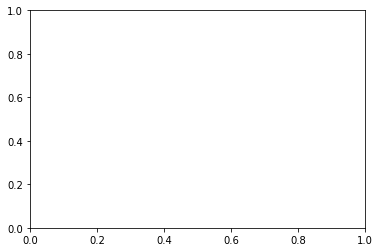

In [50]:
import seaborn as sns

#plt.rcParams["figure.figsize"]=12,8
#sns.kdeplot(data=data_raw["driver_age"])
#plt.show()


plt.figure()
sns.kdeplot(x=data_raw["driver_age"], fill=True, data=data)
plt.show()

In [60]:
age_mean=data_raw["driver_age"].mean()
age_min=data_raw["driver_age"].min()
age_max=data_raw["driver_age"].max()
age_counts = data_raw["driver_age"].value_counts()
print(age_mean,age_min,age_max)

41.86862544673168 0 99


IN US official driving age can be at least 14:14–16 (for permit) 16–17 (for restricted license) 17–18 (for unrestricted license))
Thus We will drop the ages under 14, which are meaningless in our research:


We will split data according to ages:
young:[14,29]
middle age : [30,59]
old : [60,99]

In [61]:
#Split into the groups according to driver_age columns:
data_young=data_raw[(data_raw['driver_age'] >= 14) & (data_raw['driver_age'] < 30)]
data_middle=data_raw[(data_raw['driver_age'] >= 30) & (data_raw['driver_age'] < 60)]
data_old=data_raw[(data_raw['driver_age'] >= 60) & (data_raw['driver_age'] < 99)]



group_young=(X_test['driver_age'] >= 14) & (X_test['driver_age'] < 30)
group_middle=(X_test['driver_age'] >= 30) & (X_test['driver_age'] < 60)
group_old=(X_test['driver_age'] >= 60) & (X_test['driver_age'] <= 99 )

/Users/umutekingezer/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


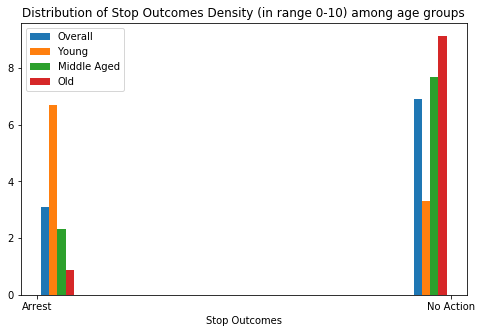

In [62]:
#Plot the distribution
plt.figure(figsize=(8,5))


plt.hist([data_raw['stop_outcome'], data_young['stop_outcome'], data_middle['stop_outcome'],data_old['stop_outcome']], density=True, 
           label=['Overall', 'Young', 'Middle Aged','Old'])

plt.xlabel('Stop Outcomes')
plt.title('Distribution of Stop Outcomes Density (in range 0-10) among age groups')
plt.legend(loc='best')
plt.show()

In [63]:
data_young

,state,stop_date,driver_gender,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district,driver_age
0,NC,2000-07-31,M,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,23
1,NC,2000-07-31,F,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,29
3,NC,2000-07-31,M,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,29
4,NC,2000-07-31,M,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,24
5,NC,2000-07-31,M,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402079,NC,2015-12-31,M,W N,White,DUI,Incident to Arrest,False,Arrest,Observation Suspected Contraband,21134,False,E1,21
402082,NC,2015-12-31,M,W N,White,Speeding,Probable Cause,True,Arrest,Observation Suspected Contraband,21715,True,G3,18
402083,NC,2015-12-31,F,B N,Black,Registration/plates,Incident to Arrest,False,Arrest,Other Official Info,10592,False,G5,21
402084,NC,2015-12-31,F,W N,White,Speeding,Incident to Arrest,False,Arrest,Observation Suspected Contraband,21848,False,E1,29


In [64]:
#take confusion matrix of both 3 groups

cm_young = confusion_matrix(y_test[group_young], y_pred[group_young])
cm_middle = confusion_matrix(y_test[group_middle], y_pred[group_middle])
cm_old = confusion_matrix(y_test[group_old], y_pred[group_old])




tn_young, fp_young, fn_young, tp_young = cm_young.ravel()
tn_middle, fp_middle, fn_middle, tp_middle = cm_middle.ravel()
tn_old, fp_old, fn_old, tp_old = cm_old.ravel()


<Figure size 432x288 with 0 Axes>

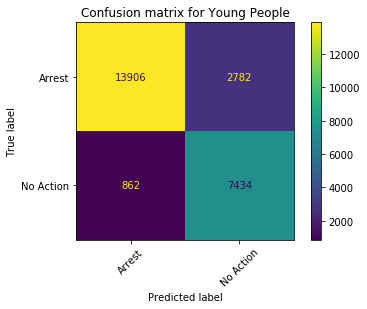

<Figure size 432x288 with 0 Axes>

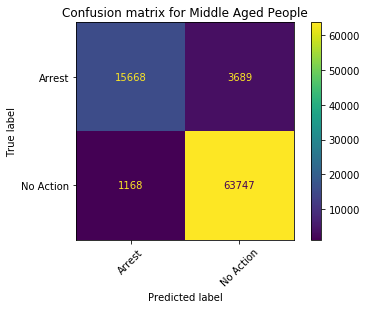

<Figure size 432x288 with 0 Axes>

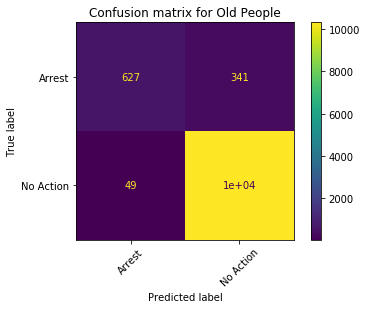

In [65]:
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_young, display_labels=['Arrest', 'No Action'])
disp.plot()
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for Young People")
plt.show()

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_middle, display_labels=['Arrest', 'No Action'])
disp.plot()
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for Middle Aged People")
plt.show()

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_old, display_labels=['Arrest', 'No Action'])
disp.plot()
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for Old People")
plt.show()


# TODO :Collect them into the one plot like gender and ethnicity !!

# Independence for Age Groups

In [66]:
independence_young=independence(tn_young, fp_young, fn_young, tp_young)
independence_middle=independence(tn_middle, fp_middle, fn_middle, tp_middle)
independence_old=independence(tn_old, fp_old, fn_old, tp_old)


print('Independence of Young People           :\t',independence_young)
print('Independence of Middle Aged People     :\t',independence_middle)
print('Independence of Old People             :\t',independence_old)

Independence of Young People           :	 0.4089016970861351
Independence of Middle Aged People     :	 0.8002183406113537
Independence of Old People             :	 0.940403773252226


# Seperation for Age Groups

In [67]:
(separation_young_y1,separation_young_y0) = separation(tn_young, fp_young, fn_young, tp_young)
(separation_middle_y1,separation_middle_y0) = separation(tn_middle, fp_middle, fn_middle, tp_middle)
(separation_old_y1,separation_old_y0) = separation(tn_old, fp_old, fn_old, tp_old)



print('Separation Y1 Young People         :\t',separation_young_y1)
print('Separation Y1 Middle Aged People   :\t',separation_middle_y1)
print('Separation Y1 Old People           :\t',separation_old_y1)
print("*"*65)
print('Separation Y0 Young People         :\t',separation_young_y0)
print('Separation Y0 Middle Aged People   :\t',separation_middle_y0)
print('Separation Y0 Old People           :\t',separation_old_y0)

Separation Y1 Young People         :	 0.7276820673453407
Separation Y1 Middle Aged People   :	 0.945296280918204
Separation Y1 Old People           :	 0.968032248992219
*****************************************************************
Separation Y0 Young People         :	 0.9416305525460456
Separation Y0 Middle Aged People   :	 0.9306248515086719
Separation Y0 Old People           :	 0.9275147928994083


# Sufficiency for Age Groups

In [68]:
(sufficiency_young_r1,sufficiency_young_r0) = sufficiency(tn_young, fp_young, fn_young, tp_young)
(sufficiency_middle_r1,sufficiency_middle_r0) = sufficiency(tn_middle, fp_middle, fn_middle, tp_middle)
(sufficiency_old_r1,sufficiency_old_r0)=sufficiency(tn_old, fp_old, fn_old, tp_old)



print('Sufficiency R1 Young People           :\t',sufficiency_young_r1)
print('Sufficiency R1 Middle Aged People     :\t',sufficiency_middle_r1)
print('Sufficiency R1 Old People             :\t',sufficiency_old_r1)
print("*"*65)
print('Sufficiency R0 Young People           :\t',sufficiency_young_r0)
print('Sufficiency R0 Middle Aged People     :\t',sufficiency_middle_r0)
print('Sufficiency R0 Old People             :\t',sufficiency_old_r0)


Sufficiency R1 Young People           :	 0.8960945033751205
Sufficiency R1 Middle Aged People     :	 0.9820072402372333
Sufficiency R1 Old People             :	 0.995277108433735
*****************************************************************
Sufficiency R0 Young People           :	 0.16670661553211888
Sufficiency R0 Middle Aged People     :	 0.19057705222916774
Sufficiency R0 Old People             :	 0.3522727272727273


# What do you notice? question must be answered !!

As the results suggest, unbiased unitary nature of law, unfortunately, does not apply to real life cases. Many criminally irrelevant attributes such as but not limited to race, age and gender play an explicit role on the decisional outcome. For example data clarifies that the police tend to arrest citizens with hispanic and afro-american heritage more than the white, while positive distinction applied to males and can also be observed. Moreover, the distribution of age among the respective cases of arrest and no action also reveals that the chance of being arrested increases first and then starts to decrease after early 20's. 

# Task 4 :

Exclude the features you used as sensitive characteristics from the training of the model. Check the new model for fairness. Is it fairer now? Why/why not?

#The feautres driver_age, driver_gender and driver_race will be excluded, since according to Task 3 those features lead to biased prediction.In the chosen features race, age and gender includes sensitive characteristics due to human bias.

#Lets create new X feature by excluding the sensitive characters represented columns.


In [69]:
X_encoded

,Asian,Black,Hispanic,Other,White,driver_age,driver_gender,violation,contraband_found,drugs_related_stop,district,Erratic Suspicious Behaviour,Informant Tip,No Search Conducted,Observation Suspected Contraband,Other Official Info,Suspicious Movement,Witness Observation
0,0,0,0,0,1,23,1,6,0,0,34,0,0,1,0,0,0,0
1,0,0,0,0,1,29,0,6,0,0,34,0,0,1,0,0,0,0
2,0,1,0,0,0,49,0,6,0,0,34,0,0,1,0,0,0,0
3,0,1,0,0,0,29,1,6,0,0,34,0,0,1,0,0,0,0
4,0,0,1,0,0,24,1,6,0,0,34,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402082,0,0,0,0,1,18,1,6,1,1,47,0,0,0,1,0,0,0
402083,0,1,0,0,0,21,0,3,0,0,49,0,0,0,0,1,0,0
402084,0,0,0,0,1,29,0,6,0,0,32,0,0,0,1,0,0,0
402085,0,0,0,0,1,18,0,2,1,1,43,0,0,0,1,0,0,0


In [70]:

X_unbiased=X_encoded
X_unbiased.drop(['driver_gender', 'driver_age','Black', 'Hispanic','White','Asian','Other'], axis=1, inplace=True)

In [71]:
X_unbiased

,violation,contraband_found,drugs_related_stop,district,Erratic Suspicious Behaviour,Informant Tip,No Search Conducted,Observation Suspected Contraband,Other Official Info,Suspicious Movement,Witness Observation
0,6,0,0,34,0,0,1,0,0,0,0
1,6,0,0,34,0,0,1,0,0,0,0
2,6,0,0,34,0,0,1,0,0,0,0
3,6,0,0,34,0,0,1,0,0,0,0
4,6,0,0,34,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
402082,6,1,1,47,0,0,0,1,0,0,0
402083,3,0,0,49,0,0,0,0,1,0,0
402084,6,0,0,32,0,0,0,1,0,0,0
402085,2,1,1,43,0,0,0,1,0,0,0


In [72]:
#Now we create new ML model with the best classifier Decision Tree Classifier
from sklearn.model_selection import train_test_split

y_unbiased=y_encoded
# Split the data into training and test set
# test_size=0.3: 70% training set, 30% test set
# random_state=350: 
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_unbiased, y_unbiased, test_size=0.3, random_state=350)

# Comparision for KNeighborsClassifier

<Figure size 432x288 with 0 Axes>

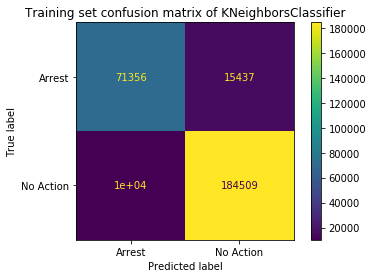

<Figure size 432x288 with 0 Axes>

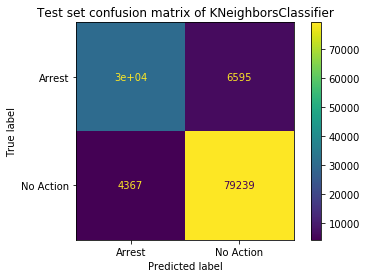

In [73]:


from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNN with n_neighbors=1 (k=1)
knn_u = KNeighborsClassifier(n_neighbors=1)
# Train the model on the training set with the encoded labels
knn_u.fit(X_train_u, y_train_u)

# Plot the confusion matrix for the training set
plt.figure()
plot_confusion_matrix(knn_u, X_train_u, y_train_u, display_labels=['Arrest', 'No Action'])
plt.title('Training set confusion matrix of KNeighborsClassifier')
plt.show()

# Plot the confusion matrix for the test set
plt.figure()
plot_confusion_matrix(knn_u, X_test_u, y_test_u, display_labels=['Arrest', 'No Action'])
plt.title('Test set confusion matrix of KNeighborsClassifier')
plt.show()

In [74]:
#y_pred for KNeighborsClassifier Classifier
#y_pred_u for KNeighborsClassifier Classifier for unbiased variable

y_pred_k=knn.predict(X_test)
y_pred_uk=knn_u.predict(X_test_u)



cm_biased_k = confusion_matrix(y_test, y_pred_k)
cm_unbiased_k = confusion_matrix(y_test_u, y_pred_uk)


tn_b_k, fp_b_k, fn_b_k, tp_b_k = cm_biased_k.ravel()
tn_u_k, fp_u_k, fn_u_k, tp_u_k = cm_unbiased_k.ravel()



# Independence of biased and unbiased feature for KNeighborsClassifier

In [75]:
independence_biased_k=independence(tn_b_k, fp_b_k, fn_b_k, tp_b_k)
independence_unbiased_k=independence(tn_u_k, fp_u_k, fn_u_k, tp_u_k)


print('Independence Biased for KNeighborsClassifier :\t',independence_biased_k)
print('Independence Unbiased for KNeighborsClassifier:\t',independence_unbiased_k)



Independence Biased for KNeighborsClassifier :	 0.696701401842042
Independence Unbiased for KNeighborsClassifier:	 0.7115654040969269


# Seperation of biased and unbiased feature for  KNeighborsClassifier

In [76]:
(separation_biased_y1_k,separation_biased_y0_k) = separation(tn_b_k, fp_b_k, fn_b_k, tp_b_k)
(separation_unbiased_y1_k,separation_unbiased_y0_k) = separation(tn_u_k, fp_u_k, fn_u_k, tp_u_k)

print('Separation Y1 Biased for KNeighborsClassifier  :\t',separation_biased_y1_k)
print('Separation Y1 Unbiased for KNeighborsClassifier:\t',separation_unbiased_y1_k)
print("*"*75)
print('Separation Y0 Biased for KNeighborsClassifier  :\t',separation_biased_y0_k)
print('Separation Y0 Unbiased for KNeighborsClassifier:\t',separation_unbiased_y0_k)

Separation Y1 Biased for KNeighborsClassifier  :	 0.9217762758653515
Separation Y1 Unbiased for KNeighborsClassifier:	 0.9231656453153761
***************************************************************************
Separation Y0 Biased for KNeighborsClassifier  :	 0.8322035751380309
Separation Y0 Unbiased for KNeighborsClassifier:	 0.874486247233639


# Sufficiency of biased and unbiased feature for KNeighborsClassifier

In [77]:
(sufficiency_biased_r1_k,sufficiency_biased_r0_k) = sufficiency(tn_b_k, fp_b_k, fn_b_k, tp_b_k)
(sufficiency_unbiased_r1_k,sufficiency_unbiased_r0_k) = sufficiency(tn_u_k, fp_u_k, fn_u_k, tp_u_k)

print('Sufficiency R1 Biased for KNeighborsClassifier   :\t',sufficiency_biased_r1_k)
print('Sufficiency R1 Unbiased for KNeighborsClassifier :\t',sufficiency_unbiased_r1_k)
print("*"*80)
print('Sufficiency R0 Biased for KNeighborsClassifier   :\t',sufficiency_biased_r0_k)
print('Sufficiency R0 Unbiased for KNeighborsClassifier :\t',sufficiency_unbiased_r0_k)

Sufficiency R1 Biased for KNeighborsClassifier   :	 0.9265722555797431
Sufficiency R1 Unbiased for KNeighborsClassifier :	 0.9477669066813387
********************************************************************************
Sufficiency R0 Biased for KNeighborsClassifier   :	 0.17757488992733853
Sufficiency R0 Unbiased for KNeighborsClassifier :	 0.17814213554469085


In [78]:
#TODO It's clear that in this model using unbiased model is more adventegous. Explain in paper, interpret the results

# Comparision for Decision Tree

<Figure size 432x288 with 0 Axes>

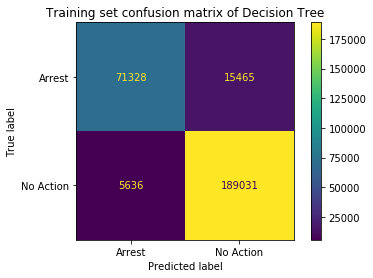

<Figure size 432x288 with 0 Axes>

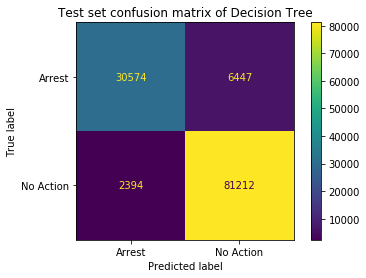

In [79]:


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#same parameter like second task
# Maximum depth of the tree
md=6
# The minimum number of samples required to split an internal node
mss=18
# Maximum number of allowed leaf nodes
mln=10

# Create an instance of the decision tree classifier with the predefined parameters
dct_u = DecisionTreeClassifier(random_state=42, max_depth=md, min_samples_split=mss, max_leaf_nodes=mln, criterion='gini')

# Train the model using the training set
dct_u.fit(X_train_u, y_train_u)

# Plot the confusion matrix for the training set
plt.figure()
plot_confusion_matrix(dct_u, X_train_u, y_train_u, display_labels=['Arrest', 'No Action'])
plt.title('Training set confusion matrix of Decision Tree')
plt.show()

# Plot the confusion matrix for the test set
plt.figure()
plot_confusion_matrix(dct_u, X_test_u, y_test_u, display_labels=['Arrest', 'No Action'])
plt.title('Test set confusion matrix of Decision Tree')
plt.show()




In [80]:
#y_pred for Decision Tree Classifier
#y_pred_u for Decision Tree Classifier for unbiased variable

y_pred=dct.predict(X_test)
y_pred_u=dct_u.predict(X_test_u)



cm_biased = confusion_matrix(y_test, y_pred)
cm_unbiased = confusion_matrix(y_test_u, y_pred_u)


tn_b, fp_b, fn_b, tp_b = cm_biased.ravel()
tn_u, fp_u, fn_u, tp_u = cm_unbiased.ravel()


# Independence of biased and unbiased feature for Decision Tree

In [81]:
independence_biased=independence(tn_b, fp_b, fn_b, tp_b)
independence_unbiased=independence(tn_u, fp_u, fn_u, tp_u)


print('Independence Biased for Decision Tree:\t',independence_biased)
print('Independence Unbiased for Decision Tree:\t',independence_unbiased)


Independence Biased for Decision Tree:	 0.7323236091422318
Independence Unbiased for Decision Tree:	 0.7266946869274706


# Seperation of biased and unbiased feature for Decision Tree

In [82]:
(separation_biased_y1,separation_biased_y0) = separation(tn_b, fp_b, fn_b, tp_b)
(separation_unbiased_y1,separation_unbiased_y0) = separation(tn_u, fp_u, fn_u, tp_u)

print('Separation Y1 Biased for Decision Tree  :\t',separation_biased_y1)
print('Separation Y1 Unbiased for Decision Tree:\t',separation_unbiased_y1)
print("*"*70)
print('Separation Y0 Biased for Decision Tree  :\t',separation_biased_y0)
print('Separation Y0 Unbiased for Decision Tree:\t',separation_unbiased_y0)

Separation Y1 Biased for Decision Tree  :	 0.9228531322873509
Separation Y1 Unbiased for Decision Tree:	 0.9264536442350472
**********************************************************************
Separation Y0 Biased for Decision Tree  :	 0.935488866177336
Separation Y0 Unbiased for Decision Tree:	 0.9273841300655181


# Sufficiency of biased and unbiased feature for Decision Tree

In [83]:
(sufficiency_biased_r1,sufficiency_biased_r0) = sufficiency(tn_b, fp_b, fn_b, tp_b)
(sufficiency_unbiased_r1,sufficiency_unbiased_r0) = sufficiency(tn_u, fp_u, fn_u, tp_u)

print('Sufficiency R1 Biased for Decision Tree  :\t',sufficiency_biased_r1)
print('Sufficiency R1 Unbiased for Decision Tree:\t',sufficiency_unbiased_r1)
print("*"*80)
print('Sufficiency R0 Biased for Decision Tree  :\t',sufficiency_biased_r0)
print('Sufficiency R0 Unbiased for Decision Tree:\t',sufficiency_unbiased_r0)


Sufficiency R1 Biased for Decision Tree  :	 0.9750855201779777
Sufficiency R1 Unbiased for Decision Tree:	 0.9713656914575509
********************************************************************************
Sufficiency R0 Biased for Decision Tree  :	 0.18408470867885796
Sufficiency R0 Unbiased for Decision Tree:	 0.17414440452716026


In [84]:
#TODO:In this model, there are some trade-off between independence seperation and sufficiency values for biased and unbiased features
#Interpret the results for Decision Tree Model



In [85]:
#Finally we have to compare the fairness results for unbiased and biased features,
#Compare the results of Decision Tree and Knn models
#It's obvious that building model with unbiased feauture with KNN is much better than Decision Tree according to fairness metrics.
#

# Task 5 

In [86]:
from yellowbrick.classifier.threshold import discrimination_threshold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
discrimination_threshold(knn, X_train, y_train)


ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
from yellowbrick.classifier.threshold import discrimination_threshold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
discrimination_threshold(dct, X_train, y_train)

Looking to the both threshold plots, it can be observed that different methods yield different rates for the same threshold values. Bigger thresholds yield bigger precisions and smaller recall values and vice versa.

Moreover our treasure hunt for the "fairest" system can be finalized, as the fairest system would be the one turning out the maximal f1 value for the selected methods. Thus, it can be concluded that, tr_knn:0,5 and tr_0,3 are the values yielding the fairest versions of their respective models.

In [ ]:
#TODO: CREATE ONE MODEL WITH RESPECTIVE TR VALUES AND SHOW THROUGH EXAMPLE THAT IT REALLY IS FAIRER.